In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sparse_filtering import SparseFiltering
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline
%run nifti_tools.ipynb
# !pip install sparse_filtering

In [58]:
# Running the SFT for different number of features

# Loading the voxel * gene matrix
X = np.load('/data/bioprotean/ABA/MEMMAP/genes_list/genes_half_mask_pos_std.npy')

# List of numbers
# numbers_list = range(50,601,50)
numbers_list = [594]

for n in numbers_list:
    estimator = SparseFiltering(n_features = n, maxfun = 200, iprint = 10)
    features = estimator.fit_transform(X)
    weights = estimator.w_
    
    # Saving features and weights
    np.save('/data/bioprotean/ABA/SFT/'+str(n)+'_features.npy', features)
    np.save('/data/bioprotean/ABA/SFT/'+str(n)+'_weights.npy', weights)

In [ ]:
# Running the SFT for different number of features

# List of feature numbers
features_list = range(50,601,50)

# List of cluster numbers
numbers_list = list(range(1,50))
extra_list = list(range(50,551,50))
add_number = 594
numbers_list.extend(extra_list)
numbers_list.append(add_number)

for n_features in features_list:
    # Loading features
    features = np.load('/data/bioprotean/ABA/SFT/'+str(n_features)+'_features.npy')
    
    # Running K-means
    for n_clusters in numbers_list:
        kmeans = KMeans(n_clusters = n_clusters, n_init = 50, random_state = 0)
        kmeans.fit_predict(X)
        labels = kmeans.labels_
        
        # Saving the labels
        np.save('/data/bioprotean/ABA/SFT/'+str(n_features)+'features_'+str(n_clusters)+'_clusters.npy', labels)

In [71]:
estimator.w_[0][4]

118472.68866407534

# Clustering the features

In [56]:
# Running K-means on features
n_clusters = 200
kmeans = KMeans(n_clusters=n_clusters, n_init=50, random_state=0)
kmeans.fit_predict(features)
labels = kmeans.labels_

# Reconstructing the labels
indices_path = '/data/bioprotean/ABA/MEMMAP/genes_list/half_indices.npy'
labels_rc = reconstruct_ABA(labels, indices_path)

#Visualizing one slice
vol = labels_rc.reshape(67,58,41)
s = vol[30,:,:]
plt.imshow(s)

In [ ]:
# Running for list of numbers

numbers_list = list(range(1,50))
extra_list = list(range(50,551,50))
add_number = 594
numbers_list.extend(extra_list)
numbers_list.append(add_number)

# Running K-means on features
for n in numbers_list:
    kmeans = KMeans(n_clusters = n, n_init = 50, random_state = 0)
    kmeans.fit_predict(features)
    
    # Saving the labels
    labels = kmeans.labels_
    labels_path = '/data/bioprotean/ABA/SFT/Kmeans/'+str(n)+'_clusters.npy'
    np.save(labels_path, labels)

In [51]:
# Reconstructing all clusters

# List of numbers
numbers_list = list(range(1,50))
extra_list = list(range(50,551,50))
add_number = 594
numbers_list.extend(extra_list)
numbers_list.append(add_number)

# Loading K-means clusters
for i in numbers_list:
    # Loading the labels
    labels_path = '/data/bioprotean/ABA/SFT/Kmeans/'+str(i)+'_clusters.npy'
    labels = np.load(labels_path)
    
    # Reconstructing the clusters
    indices_path = '/data/bioprotean/ABA/MEMMAP/genes_list/half_indices.npy'
    labels_rc = reconstruct_ABA(labels, indices_path)
    
    # Saving to file
    save_path = '/data/bioprotean/ABA/SFT/Kmeans_rc/'+str(i)+'_clusters.npy'
    np.save(save_path, labels_rc)

# Visualizing slices

In [5]:
def plot_SFT_feature_slice(features_arr, feature_n, slice_n, view = 'Sagittal'):
    '''
    Plotting a feature in the selected slice.
    
    Args:
        features_arr: array
            The features array.
        
        feature_n: int
            The number of the feature.
        
        slice_n: int
            The number of the slice to show.
    
    Returns:
        plot
    '''
    # Selecting the feature from the main features array
    feature = features_arr[:, feature_n]
    
    # Reconstructing the features
    indices_path = '/data/bioprotean/ABA/MEMMAP/genes_list/half_indices.npy'
    feature_rc = reconstruct_ABA(feature, indices_path, scale = True)
    
    # Reshaping the feature vector and selecting the slice
    feature_3D = feature_rc.reshape(67,58,41)
    
    if view == 'Axial':
        slice = feature_3D[slice_n,:,:]
    elif view == 'Sagittal':
        slice = feature_3D[:,slice_n,:]
    plt.imshow(slice)

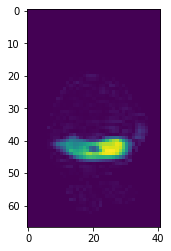

In [6]:
# Loading the featues array
features_path = '/data/bioprotean/ABA/SFT/100_features.npy'
features = np.load(features_path)

feature_n = 4
slice_n = 10
plot_SFT_feature_slice(features, feature_n, slice_n)

# Clustering features separately

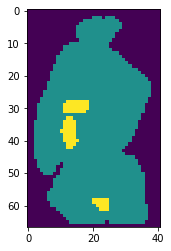

In [59]:
# Loading the features
features_path = '/data/bioprotean/ABA/SFT/600_features.npy'
features = np.load(features_path)

# Selecting the feature
feature_n = 19
feature = features[:, feature_n].reshape(-1,1)

# Running clustering
n_clusters = 2
kmeans = KMeans(n_clusters = n_clusters, random_state = 0)
kmeans.fit_predict(feature)
labels = kmeans.labels_

# Reconstructing the labels
indices_path = '/data/bioprotean/ABA/MEMMAP/genes_list/half_indices.npy'
labels_rc = reconstruct_ABA(labels, indices_path)

# Visualizing the slice
slice_n = 20
slice = labels_rc[:,slice_n,:]
plt.imshow(slice)

In [21]:
# Saving separate clusters to a single array

# Loading the features
total_features = 100
features_path = '/data/bioprotean/ABA/SFT/features/'+str(total_features)+'_features.npy'
features = np.load(features_path)

# Making an array to store all labels
labels_arr = np.zeros((features.shape[0], total_features))

for feature_n in range(total_features):
    # Selecting the feature
    feature = features[:, feature_n].reshape(-1,1)
    
    # Running clustering
    n_clusters = 2
    kmeans = KMeans(n_clusters = n_clusters, random_state = 0)
    kmeans.fit_predict(feature)
    labels = kmeans.labels_
    labels_arr[:, feature_n] = labels

np.save('/data/bioprotean/ABA/SFT/'+str(total_features)+'features_total_labels.npy', labels_arr)

In [27]:
# Loading all the labels
total_features = 100
labels_arr = np.load('/data/bioprotean/ABA/SFT/'+str(total_features)+'features_total_labels.npy')

# Making a desired dataframe
df_path = '/data/bioprotean/RAG2/AVG/MWT_avg/to_allen/overlap/200um/RAG2_neg_comp_overlap_anat.csv'
overlap_df = pd.read_csv(df_path, index_col = 'Unnamed: 0')

# overlap_df.drop(columns = 'region_overlap_ration', 'jac_overlap_ratio', 'DICE_neg_jcb_anat')
for i in range(total_features):
    overlap_df['MICE_feature_'+str(i)] = np.nan

# Inputting the indices path
indices_path = '/data/bioprotean/ABA/MEMMAP/genes_list/half_indices.npy'

# Loading the anatomy file
ant_file = '/data/bioprotean/RAG2/AVG/MWT_avg/to_allen/overlap/200um/allen_annot200.nii'
ant_vec = nifti_to_array(ant_file)

# Loading the region IDs list
region_ids_list = overlap_df['ant_id']

for row, ID in enumerate(region_ids_list):
    
    # Selecting a brain region
    region_ID = [ID]
    
    # Looping over clusters
    for i in range(total_features):
        
        # Selecting the label
        labels = labels_arr[:, i]
        
        # Reconstructing the labels
        labels_rc = reconstruct_ABA(labels, indices_path)
        
        # Selecting the smaller cluster between two
        counts = np.unique(labels_rc, return_counts = True)[1]
        cluster_ID = np.argmin(counts)
        cluster_ids = [cluster_ID]
        
        # Masking for the cluster ID
        cluster_vec = np.where(labels_rc == cluster_ID, cluster_ID, -1)
        
        # Computing the overlap for the cluster
        overlap_list = overlap_function(base_arr = ant_vec, input_arr = cluster_vec,\
        base_ids_list = region_ID, input_ids_list = cluster_ids)
        
        overlap_df['MICE_feature_'+str(i)].loc[row] = overlap_list[0]

# Saving to file
overlap_df.to_csv('/data/bioprotean/ABA/SFT/'+str(total_features)+'MICE_region_separate_clusters.csv')

/home/mabbasi6/.local/lib/python3.7/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [28]:
overlap_df.head()

,full_ant_index,structure,acronym,ish_id,ant_id,in_200_atlas,region_overlap_ratio,jac_overlap_ratio,DICE_neg_jcb_anat,MICE_feature_0,...,MICE_feature_90,MICE_feature_91,MICE_feature_92,MICE_feature_93,MICE_feature_94,MICE_feature_95,MICE_feature_96,MICE_feature_97,MICE_feature_98,MICE_feature_99
0,0,"""root""","""root""",-1.0,997,True,0.069196,0.010389,0.018065,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.013542,0.0,0.0
1,7,"""Frontal pole, layer 1""","""FRP1""",998.0,68,True,0.300000,0.002011,0.003995,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000742,0.0,0.0
2,8,"""Frontal pole, layer 2/3""","""FRP2/3""",1073.0,667,True,0.250000,0.002346,0.004648,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001038,0.0,0.0
3,19,"""Primary motor area, Layer 1""","""MOp1""",888.0,320,True,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.006066,0.0,0.0
4,20,"""Primary motor area, Layer 2/3""","""MOp2/3""",966.0,943,True,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.017581,0.0,0.0


# Finding gene weights for each feature

In [2]:
# Making a DataFrame of gene weights and genes information

# Selecting the number of features
n_features = 100

# Loading the weights array
weights = np.load('/data/bioprotean/ABA/SFT/features/'+str(n_features)+'_weights.npy')

# Loading the genes dataframe
genes_df = pd.read_csv('/data/bioprotean/ABA/MEMMAP/genes_list/final_list.csv')

# Adding new columns to the dataframe
for i in range(n_features):
    genes_df['feature_' + str(i)] = np.nan

# Inputting the weights to this dataframe:
for i in range(n_features):
    genes_df['feature_' + str(i)] = weights[i, :]

# Saving the dataframe to file
genes_df.to_csv('/data/bioprotean/ABA/SFT/'+str(n_features)+'_weights_df.csv')

In [3]:
genes_df.head()

,Old Index,Gene,Entrez ID,Image Series URL,Used in analysis?,ID,feature_0,feature_1,feature_2,feature_3,...,feature_90,feature_91,feature_92,feature_93,feature_94,feature_95,feature_96,feature_97,feature_98,feature_99
0,0,0610007P14Rik,58520,0610007P14Rik/70927828.html,1,70927828,-434770.931874,224074.527242,-384733.778863,144931.387697,...,6.744737e+04,-7.556712e+05,217361.160811,223492.561415,960443.086128,-36379.320134,-250614.525786,656249.610153,692010.996593,-149234.117990
1,1,0610010D24Rik,68339,0610010D24Rik/74363346.html,1,74363346,93854.214991,134384.636836,176235.525028,-482728.140270,...,1.382104e+06,1.015878e+06,49822.784312,109873.414669,40492.057808,316245.226445,27316.514561,461033.360895,-598592.492004,79938.900517
2,2,0610010O12Rik,66060,0610010O12Rik/75079788.html,1,75079788,27432.074410,301239.605659,76991.133164,7605.417073,...,1.120573e+05,-4.127260e+05,147038.316410,238489.861163,193440.282351,46547.099632,-200614.137624,411214.632113,-55349.658864,321962.679973
3,3,0610011I04Rik,66058,0610011I04Rik/75650863.html,1,75650863,216577.257958,-62330.956961,-142324.622752,380692.709174,...,2.819887e+05,2.165818e+05,-708487.265964,803115.694178,-23602.354681,169898.565000,-42429.512829,167450.140254,-53339.905237,-619612.634373
4,5,0610042C05Rik,66084,0610042C05Rik/77371805.html,1,77371805,-157550.678831,135712.977245,-6823.792618,-227053.535143,...,4.307272e+05,4.511145e+04,-130818.057698,152219.336426,141991.987098,286251.882929,104139.942972,163651.838377,83359.165239,-434481.467467


# Finding top genes for each brain region

In [5]:
def impacting_gene_finder(genes_df, feature_name = 'feature_0', n_top_genes = 5, output_name = 'Gene',\
    ascending = False):
    '''
    Takes the feature number and outputs the top desired gene names/Entrez IDs.
    Could go either in ascending/descending mode.
    
    Arguments:
        genes_df: DataFrame
            DataFrame of gene names and gene weights.
        
        feature_name: str, default = 'feature_0'
            The feature column name looking to extract weights for.
        
        n_top_genes: int, default = 5
            Number of top genes looking to extract.
        
        output_name: {'Gene', 'Entrez ID'}, default = 'Gene'
            The type of output looking to retrieve.
        
        ascending: bool, default = False
            Sorting genes in descending/ascending mode.
    
    Parameters:
        output_list: list
            List of desired output genes.
    '''
    
    # Sorting the daraframe by the desired feature number
    sorted_df = genes_df.sort_values(by=[feature_name], ascending=ascending, na_position='last')
    sorted_df.reset_index(drop=True, inplace=True)
    
    # Selecting the output
    output_list = sorted_df[output_name].loc[:n_top_genes].tolist()
    
    return output_list

In [16]:
impacting_gene_finder(genes_df, feature_name = 'feature_5', output_name = 'Entrez ID', ascending = False)

[22420, 16324, 18101, 17257, 269233, 14077]